In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Feb 14 14:16:04 2020

@author: thomas
"""

#MODULES
import os,sys
import re
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Circle
from matplotlib.ticker import (MultipleLocator,AutoMinorLocator)
from scipy.signal import savgol_filter
import pathlib
from matplotlib import animation
from IPython.display import display, Image, HTML
import plotly.graph_objects as go

mpl.rcParams['axes.linewidth'] = 1.5 #set the value globally

In [3]:
#CONSTANTS
cwd_PYTHON = os.getcwd()
RADIUSLARGE = 1.0
RADIUSSMALL = 0.5*RADIUSLARGE
RESTINGLENGTH = 2.5*RADIUSLARGE
csfont = {'fontname':'Times New Roman'}

#Select Hx,Hy,Theta
#HxList = [4.25, 2.75, 0.25] 
#HyList = [-4.5, -2.5, 0.0, 2.5, 4.5]
#HyList = [-4.5, 0.0, 4.5]
#ThetaList = [0.0, 90.0, 180.0, 270.0, 360.0]

#All InitConfigs
HxList = [6.25,5.75,5.25,4.75,4.25,3.75,3.25,2.75,2.25,1.75,1.25,0.75,0.25]
HyList = [-4.5,-3.5,-2.5,-1.5,-0.5,0.5,1.5,2.5,3.5,4.5]
ThetaList = [0.0,22.5,45.0,67.5,90.0,112.5,135.0,157.5,180.0,202.5,225.0,247.5,270.0,292.5,315.0,337.5,360.0]


In [5]:
def AddDiscsToPlot(ax,pos):
    global RADIUSLARGE,RADIUSSMALL
    #Add Discs
    circle1 = Circle((pos.loc[0,'aXU'], pos.loc[0,'aYU']), RADIUSLARGE, facecolor=(0.0,)*3,
                     linewidth=1,alpha=1.0,zorder=6)
    ax.add_patch(circle1)
    circle2 = Circle((pos.loc[0,'aXL'], pos.loc[0,'aYL']), RADIUSSMALL, facecolor=(0.0,)*3,
                     linewidth=1,alpha=1.0,zorder=6)
    ax.add_patch(circle2)
    #Add Swimmer "springs"
    ax.plot([pos.loc[0,'aXU'],pos.loc[0,'aXL']],
            [pos.loc[0,'aYU'],pos.loc[0,'aYL']],
            color='black',linewidth=1,zorder=5)
    circle3 = Circle((pos.loc[0,'bXU'], pos.loc[0,'bYU']), RADIUSLARGE, facecolor=(0.5,)*3,
                             linewidth=1,alpha=1.0,zorder=6)
    ax.add_patch(circle3)
    #Swimmer 2
    circle4 = Circle((pos.loc[0,'bXL'], pos.loc[0,'bYL']), RADIUSSMALL, facecolor=(0.5,)*3,
                     linewidth=1,alpha=1.0,zorder=6)
    ax.add_patch(circle4)
    #Add swimmer "springs"
    ax.plot([pos.loc[0,'bXU'],pos.loc[0,'bXL']],
            [pos.loc[0,'bYU'],pos.loc[0,'bYL']],
            color=(0.5,)*3,linewidth=1,zorder=6)
    return

def Rotate(xy, theta):
    # https://en.wikipedia.org/wiki/Rotation_matrix#In_two_dimensions
    #First Rotate based on Theta
    #Allocate Arrays
    rotationMatrix = np.zeros((2,2))
    #Calculate rotation matrix
    rotationMatrix[0,0] = np.cos(theta)
    rotationMatrix[0,1] = -1.0*np.sin(theta)
    rotationMatrix[1,0] = np.sin(theta)
    rotationMatrix[1,1] = np.cos(theta)
    return rotationMatrix.dot(xy)

def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)
    return ax

def CalcSphereCenters(globalShift,number,angle,Hy,Hx):
    #global Hx
    if number == 1:
        U = globalShift + np.array([-0.5*Hx,0.5-0.5*Hy])
        L = globalShift + np.array([-0.5*Hx,-2.0-0.5*Hy])
        return U,L
    elif number == 2:
        U = np.array([0.0,0.5])
        L = np.array([0.0,-2.0])
        rotU = Rotate(U,angle*np.pi/180.0)
        rotL = Rotate(L,angle*np.pi/180.0)
        rotU = rotU + globalShift + np.array([0.5*Hx,0.5*Hy])
        rotL = rotL + globalShift + np.array([0.5*Hx,0.5*Hy])
        return rotU,rotL

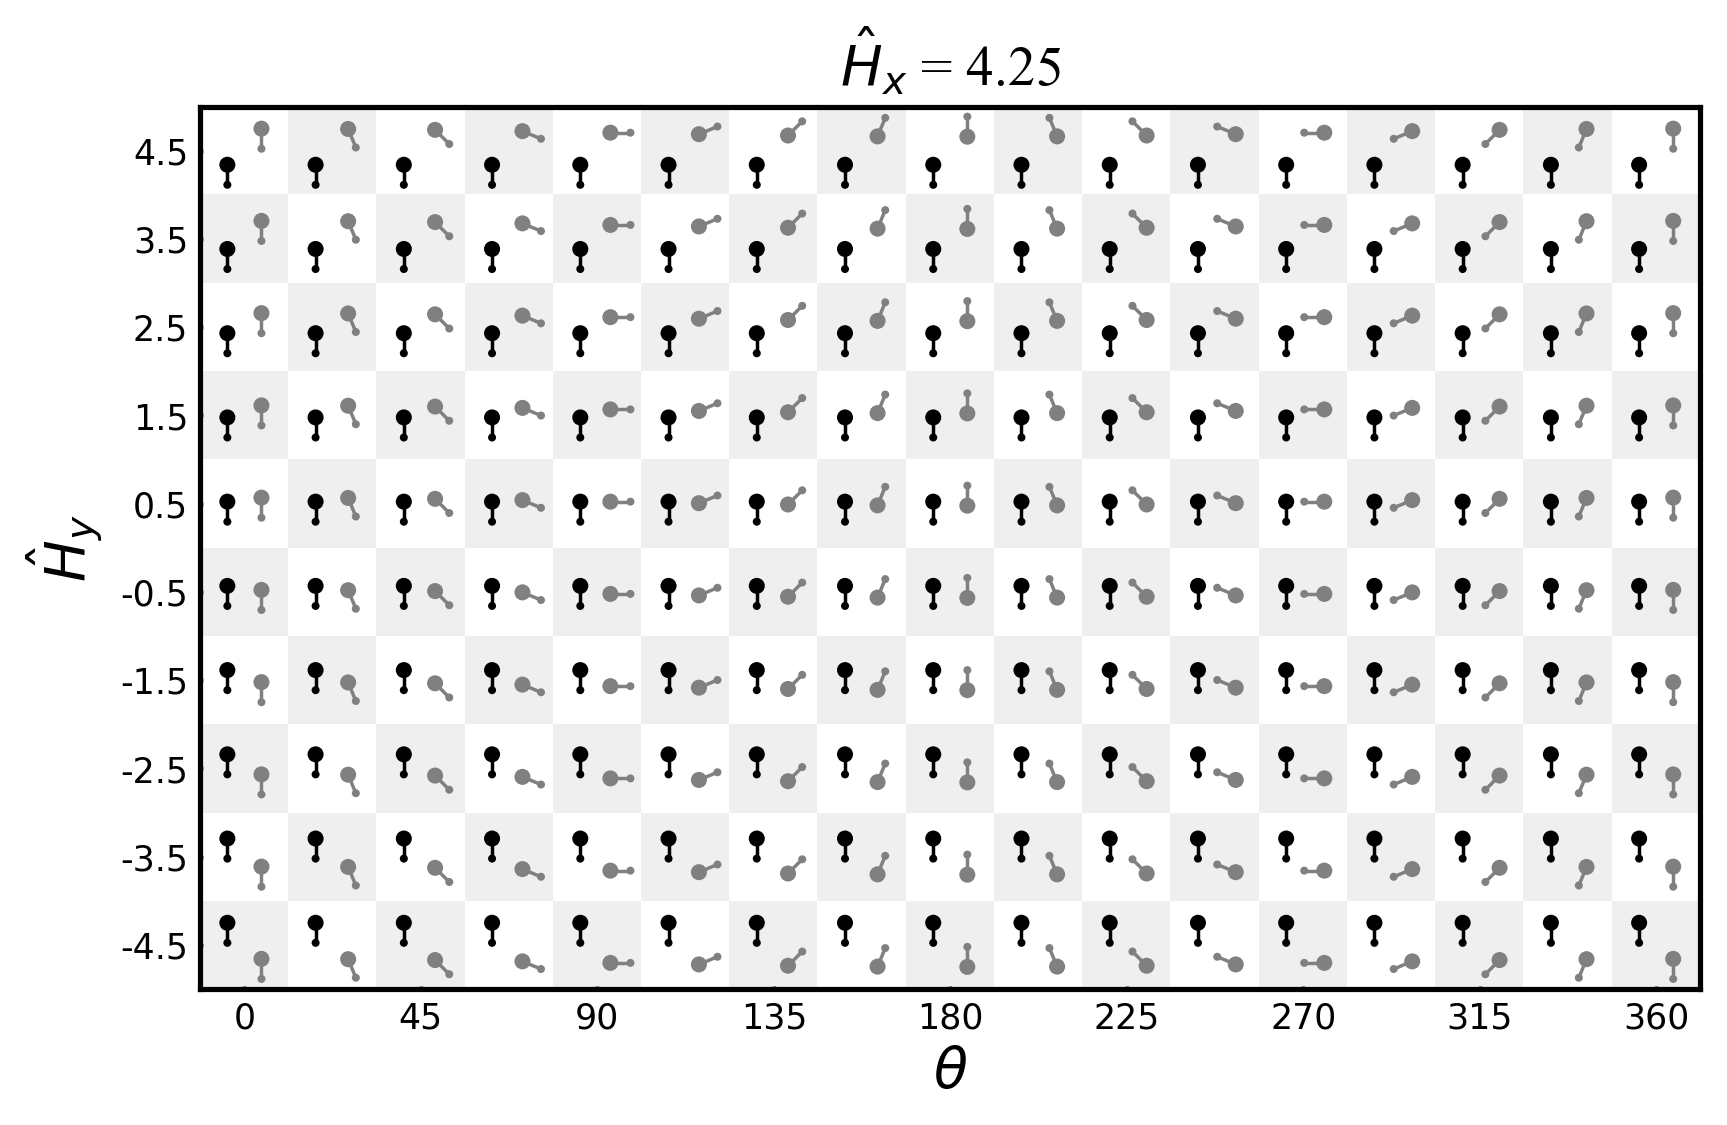

Hx = 2.75: Hy = -3.5: Theta = 202.5
Hx = 2.75: Hy = -3.5: Theta = 225.0
Hx = 2.75: Hy = -3.5: Theta = 247.5
Hx = 2.75: Hy = -3.5: Theta = 270.0
Hx = 2.75: Hy = -2.5: Theta = 45.0
Hx = 2.75: Hy = -2.5: Theta = 112.5
Hx = 2.75: Hy = -2.5: Theta = 202.5
Hx = 2.75: Hy = -2.5: Theta = 225.0
Hx = 2.75: Hy = -2.5: Theta = 247.5
Hx = 2.75: Hy = -2.5: Theta = 270.0
Hx = 2.75: Hy = -2.5: Theta = 292.5
Hx = 2.75: Hy = -1.5: Theta = 45.0
Hx = 2.75: Hy = -1.5: Theta = 67.5
Hx = 2.75: Hy = -1.5: Theta = 112.5
Hx = 2.75: Hy = -1.5: Theta = 135.0
Hx = 2.75: Hy = -1.5: Theta = 202.5
Hx = 2.75: Hy = -1.5: Theta = 225.0
Hx = 2.75: Hy = -1.5: Theta = 247.5
Hx = 2.75: Hy = -1.5: Theta = 270.0
Hx = 2.75: Hy = -1.5: Theta = 292.5
Hx = 2.75: Hy = -1.5: Theta = 315.0
Hx = 2.75: Hy = -0.5: Theta = 45.0
Hx = 2.75: Hy = -0.5: Theta = 67.5
Hx = 2.75: Hy = -0.5: Theta = 112.5
Hx = 2.75: Hy = -0.5: Theta = 135.0
Hx = 2.75: Hy = -0.5: Theta = 202.5
Hx = 2.75: Hy = -0.5: Theta = 225.0
Hx = 2.75: Hy = -0.5: Theta = 247

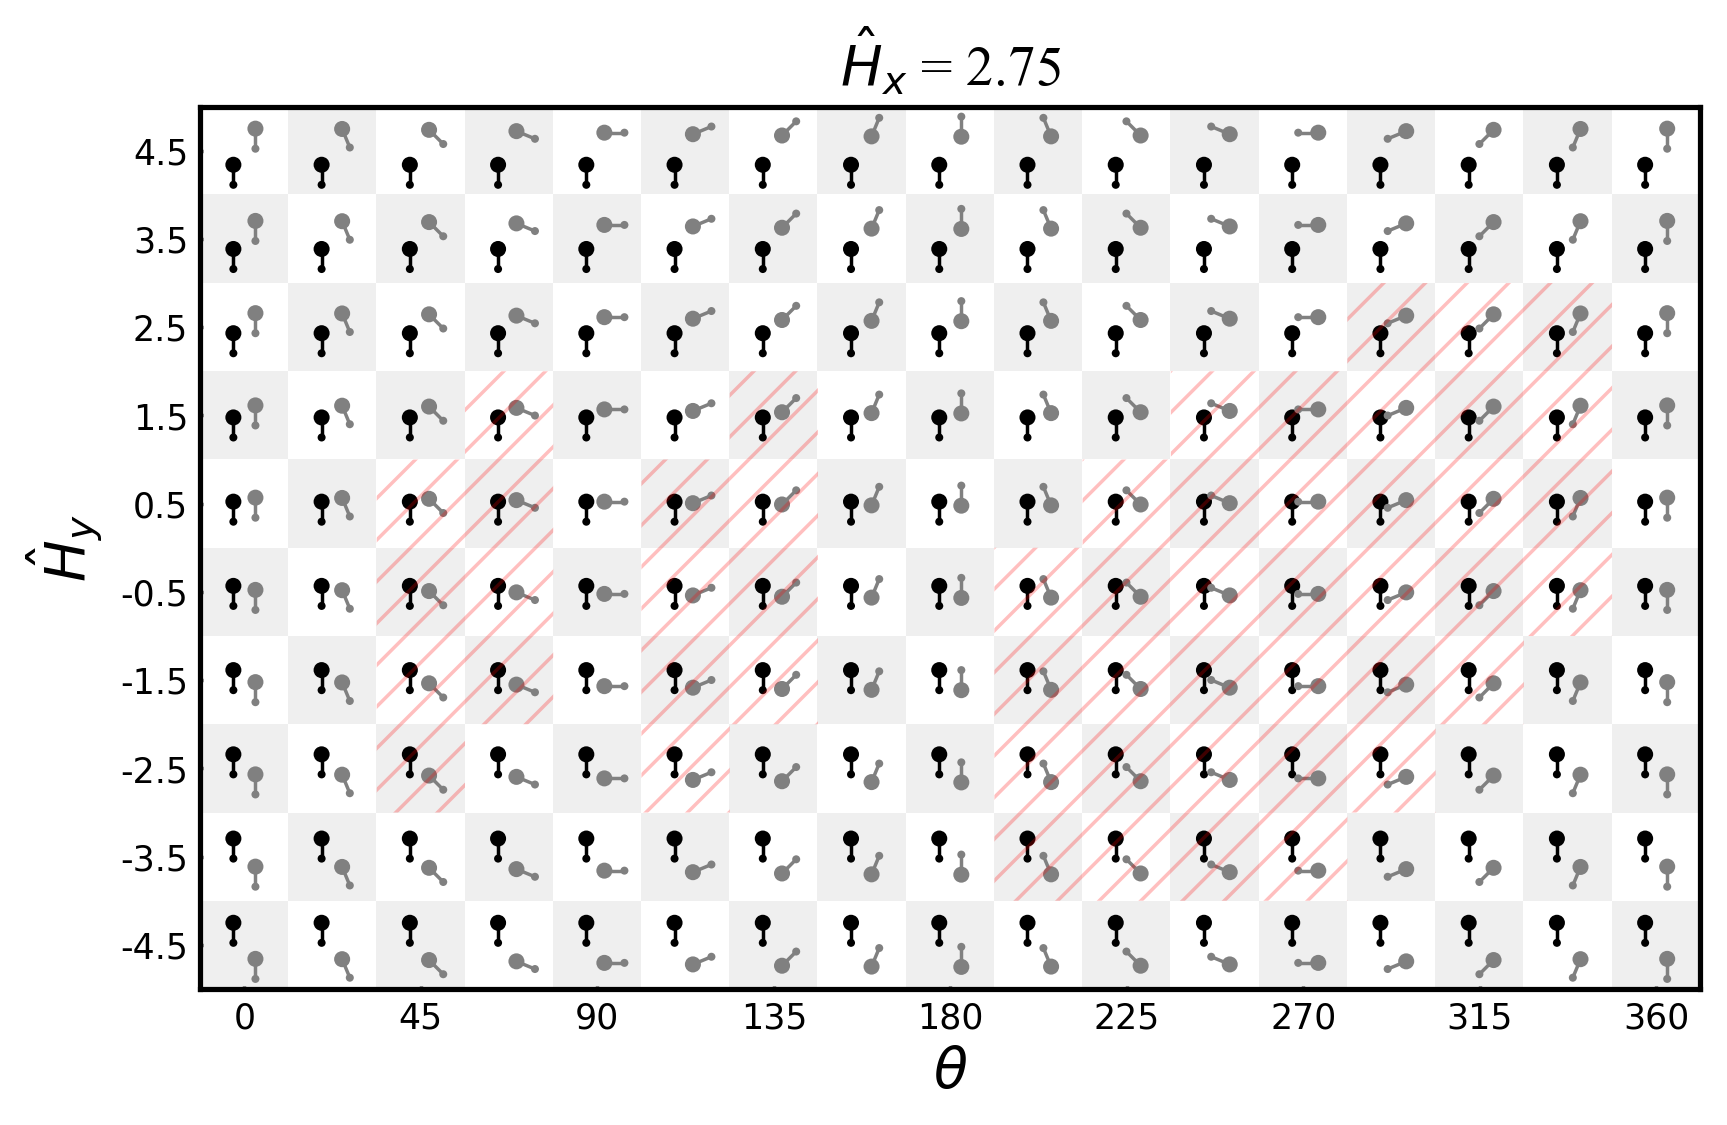

Hx = 0.25: Hy = -4.5: Theta = 135.0
Hx = 0.25: Hy = -4.5: Theta = 157.5
Hx = 0.25: Hy = -4.5: Theta = 180.0
Hx = 0.25: Hy = -4.5: Theta = 202.5
Hx = 0.25: Hy = -4.5: Theta = 225.0
Hx = 0.25: Hy = -3.5: Theta = 0.0
Hx = 0.25: Hy = -3.5: Theta = 22.5
Hx = 0.25: Hy = -3.5: Theta = 45.0
Hx = 0.25: Hy = -3.5: Theta = 67.5
Hx = 0.25: Hy = -3.5: Theta = 90.0
Hx = 0.25: Hy = -3.5: Theta = 112.5
Hx = 0.25: Hy = -3.5: Theta = 135.0
Hx = 0.25: Hy = -3.5: Theta = 157.5
Hx = 0.25: Hy = -3.5: Theta = 180.0
Hx = 0.25: Hy = -3.5: Theta = 202.5
Hx = 0.25: Hy = -3.5: Theta = 225.0
Hx = 0.25: Hy = -3.5: Theta = 247.5
Hx = 0.25: Hy = -3.5: Theta = 270.0
Hx = 0.25: Hy = -3.5: Theta = 292.5
Hx = 0.25: Hy = -3.5: Theta = 315.0
Hx = 0.25: Hy = -3.5: Theta = 337.5
Hx = 0.25: Hy = -3.5: Theta = 360.0
Hx = 0.25: Hy = -2.5: Theta = 0.0
Hx = 0.25: Hy = -2.5: Theta = 22.5
Hx = 0.25: Hy = -2.5: Theta = 45.0
Hx = 0.25: Hy = -2.5: Theta = 67.5
Hx = 0.25: Hy = -2.5: Theta = 90.0
Hx = 0.25: Hy = -2.5: Theta = 112.5
Hx =

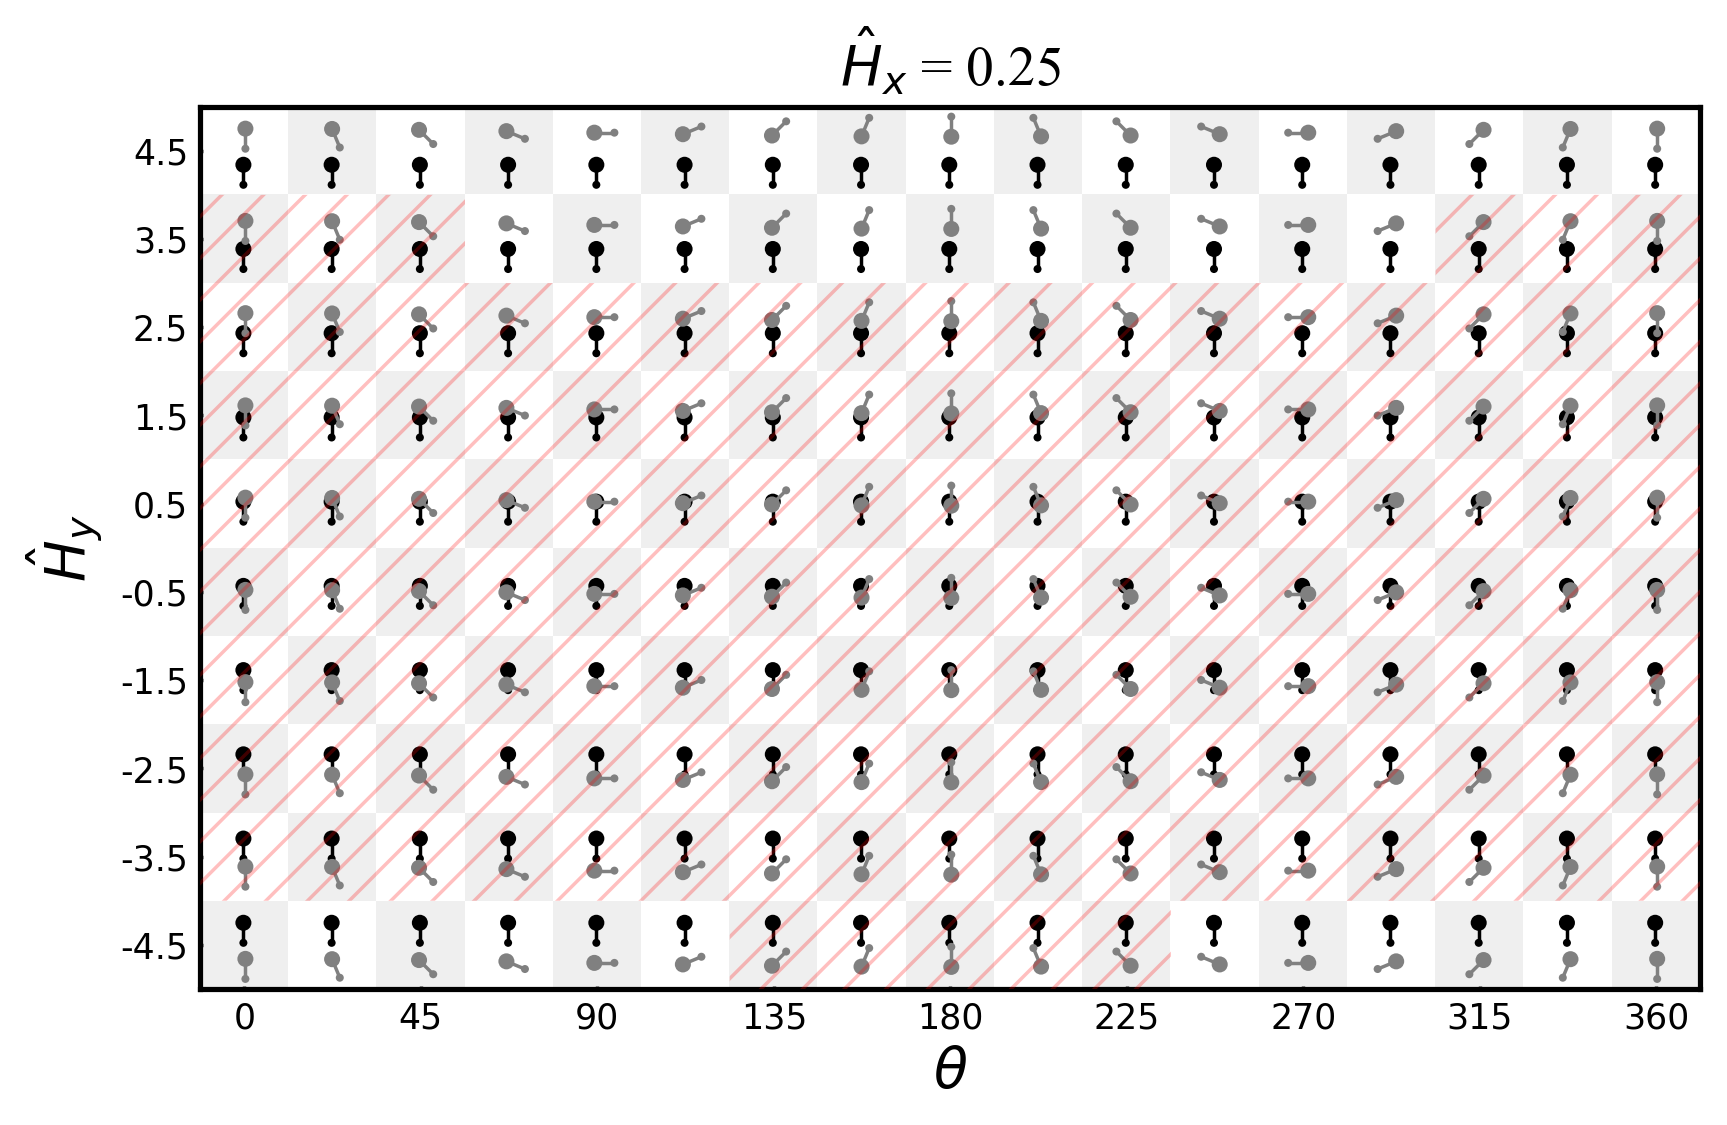

In [57]:
%matplotlib inline
#Here we are going to plot the pair of swimmers in a grid formation 
#for each Hy and Theta chosen from the list
#Trial and error baby!


#ax.set_xlabel(r'$\hat{H}_x$cos$\theta$',fontsize=12,**csfont)
#ax.set_ylabel(r'$\hat{H}_y$sin$\theta$',fontsize=12,**csfont)

allViableConfigs = pd.read_csv(cwd_PYTHON+'/allViableConfigs.csv',delimiter=' ')
chosenThetaData = allViableConfigs[allViableConfigs['Theta'] <= 0.1].copy()
chosenThetaData = chosenThetaData[chosenThetaData['Theta'] >= -0.1].copy()
chosenThetaData['Theta'] = 360.0
allViableConfigs = pd.concat([allViableConfigs,chosenThetaData],ignore_index=True)

posDict = {'aXU':[],'aYU':[],'aXL':[],'aYL':[],'bXU':[],'bYU':[],'bXL':[],'bYL':[]}
pos = pd.DataFrame(data=posDict)
#assert factor/spacing >
spacing = float(len(HyList))/float(len(ThetaList))
factor = 8.5/spacing
for Hx in HxList:
    viableConfigs = allViableConfigs[allViableConfigs['Hx'] == Hx].copy()
    fig, ax = plt.subplots(nrows=1,ncols=1,num=1,figsize=(6,6),dpi=250)
    ax.set_title(r'$\hat{H}_x$ = %.2f'%(Hx),fontsize=16,**csfont)
    ax.set_xlabel(r'$\theta$',fontsize=16,**csfont)
    ax.set_ylabel(r'$\hat{H}_y$',fontsize=16,**csfont)
    #Add Checkerboard
    nrows, ncols = len(ThetaList), len(HyList)
    background = np.zeros((ncols,nrows,3))
    for i in range(nrows):
        for j in range(ncols):
            background[j,i,:] = (1.0,)*3 if (i+j)%2 else (0.75,)*3
    boxHeight, boxWidth = 11.0, 11.0
    ax.imshow(background,cmap=None,extent=(-0.5*boxWidth,(nrows-0.5)*boxWidth,-0.5*boxHeight,(ncols-0.5)*boxHeight),alpha=0.25,origin='lower',zorder=2)#,aspect=boxHeight/boxWidth)
    #1)Find pos of first swimmer. Will use as a global shift
    for idx in range(len(HyList)):
        Hy = HyList[idx]
        valHy = Hy
        if Hy == 0.0:
            valHy = -0.5
        configs = viableConfigs[viableConfigs['Hy'] == valHy].copy()
        for jdx in range(len(ThetaList)):
            Theta = ThetaList[jdx]
            check = configs[configs['Theta'] == Theta].copy()
            #print('configs = ',configs)
            if len(ThetaList) > len(HyList):
                #globalShift = np.array([jdx*factor*spacing,idx*factor])
                globalShift = np.array([(boxWidth)*jdx,(boxHeight)*idx])
            else:
                globalShift = np.array([boxWidth*jdx,boxHeight*idx])
                #globalShift = np.array([jdx*factor,idx*factor/spacing])
            #Calculate pos of first swimmer
            aU, aL = CalcSphereCenters(globalShift,1,0.0,Hy,Hx)
            bU, bL = CalcSphereCenters(globalShift,2,Theta,Hy,Hx)
            pos.loc[0,'aXU'], pos.loc[0,'aYU'] = aU[0], aU[1]
            pos.loc[0,'aXL'], pos.loc[0,'aYL'] = aL[0], aL[1]
            pos.loc[0,'bXU'], pos.loc[0,'bYU'] = bU[0], bU[1]
            pos.loc[0,'bXL'], pos.loc[0,'bYL'] = bL[0], bL[1]
            #print(pos)
            #Plot onto grid
            AddDiscsToPlot(ax,pos)
            if check.empty:
                print('Hx = {0}: Hy = {1}: Theta = {2}'.format(Hx,Hy,Theta))
                ax.add_patch(patches.Rectangle(((globalShift[0]-5.5), (globalShift[1]-5.5)), 11.0, 11.0, 
                         hatch='//', fill=False, snap=False, linewidth=0, color='r', alpha=0.25,zorder=7))
    
    ax.set_aspect('equal')
    ax.tick_params(which='major',axis='both',direction='in',length=1,width=1,zorder=1)
    #ax.xaxis.set_major_locator(MultipleLocator(11.0))
    ax.xaxis.set_major_locator(MultipleLocator(22.0))
    ax.yaxis.set_major_locator(MultipleLocator(11.0))
    ax.set_yticklabels(['temp']+HyList)
    ax.set_xticklabels(['temp']+[0,45,90,135,180,225,270,315,360])
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(10)
    #ax.axis([-5,(len(ThetaList)-1)*factor*spacing+5,-factor-10,(len(HyList)-2)*factor+10])
    fig.tight_layout()
    ax = set_size(6,6,ax)
    strDir = cwd_PYTHON+"/../Figures/"
    pathlib.Path(strDir).mkdir(parents=True, exist_ok=True)
    fig.savefig(strDir+'init_config_grid_Hx{0}_All.png'.format(Hx))
    plt.show()
    fig.clf()
    plt.close


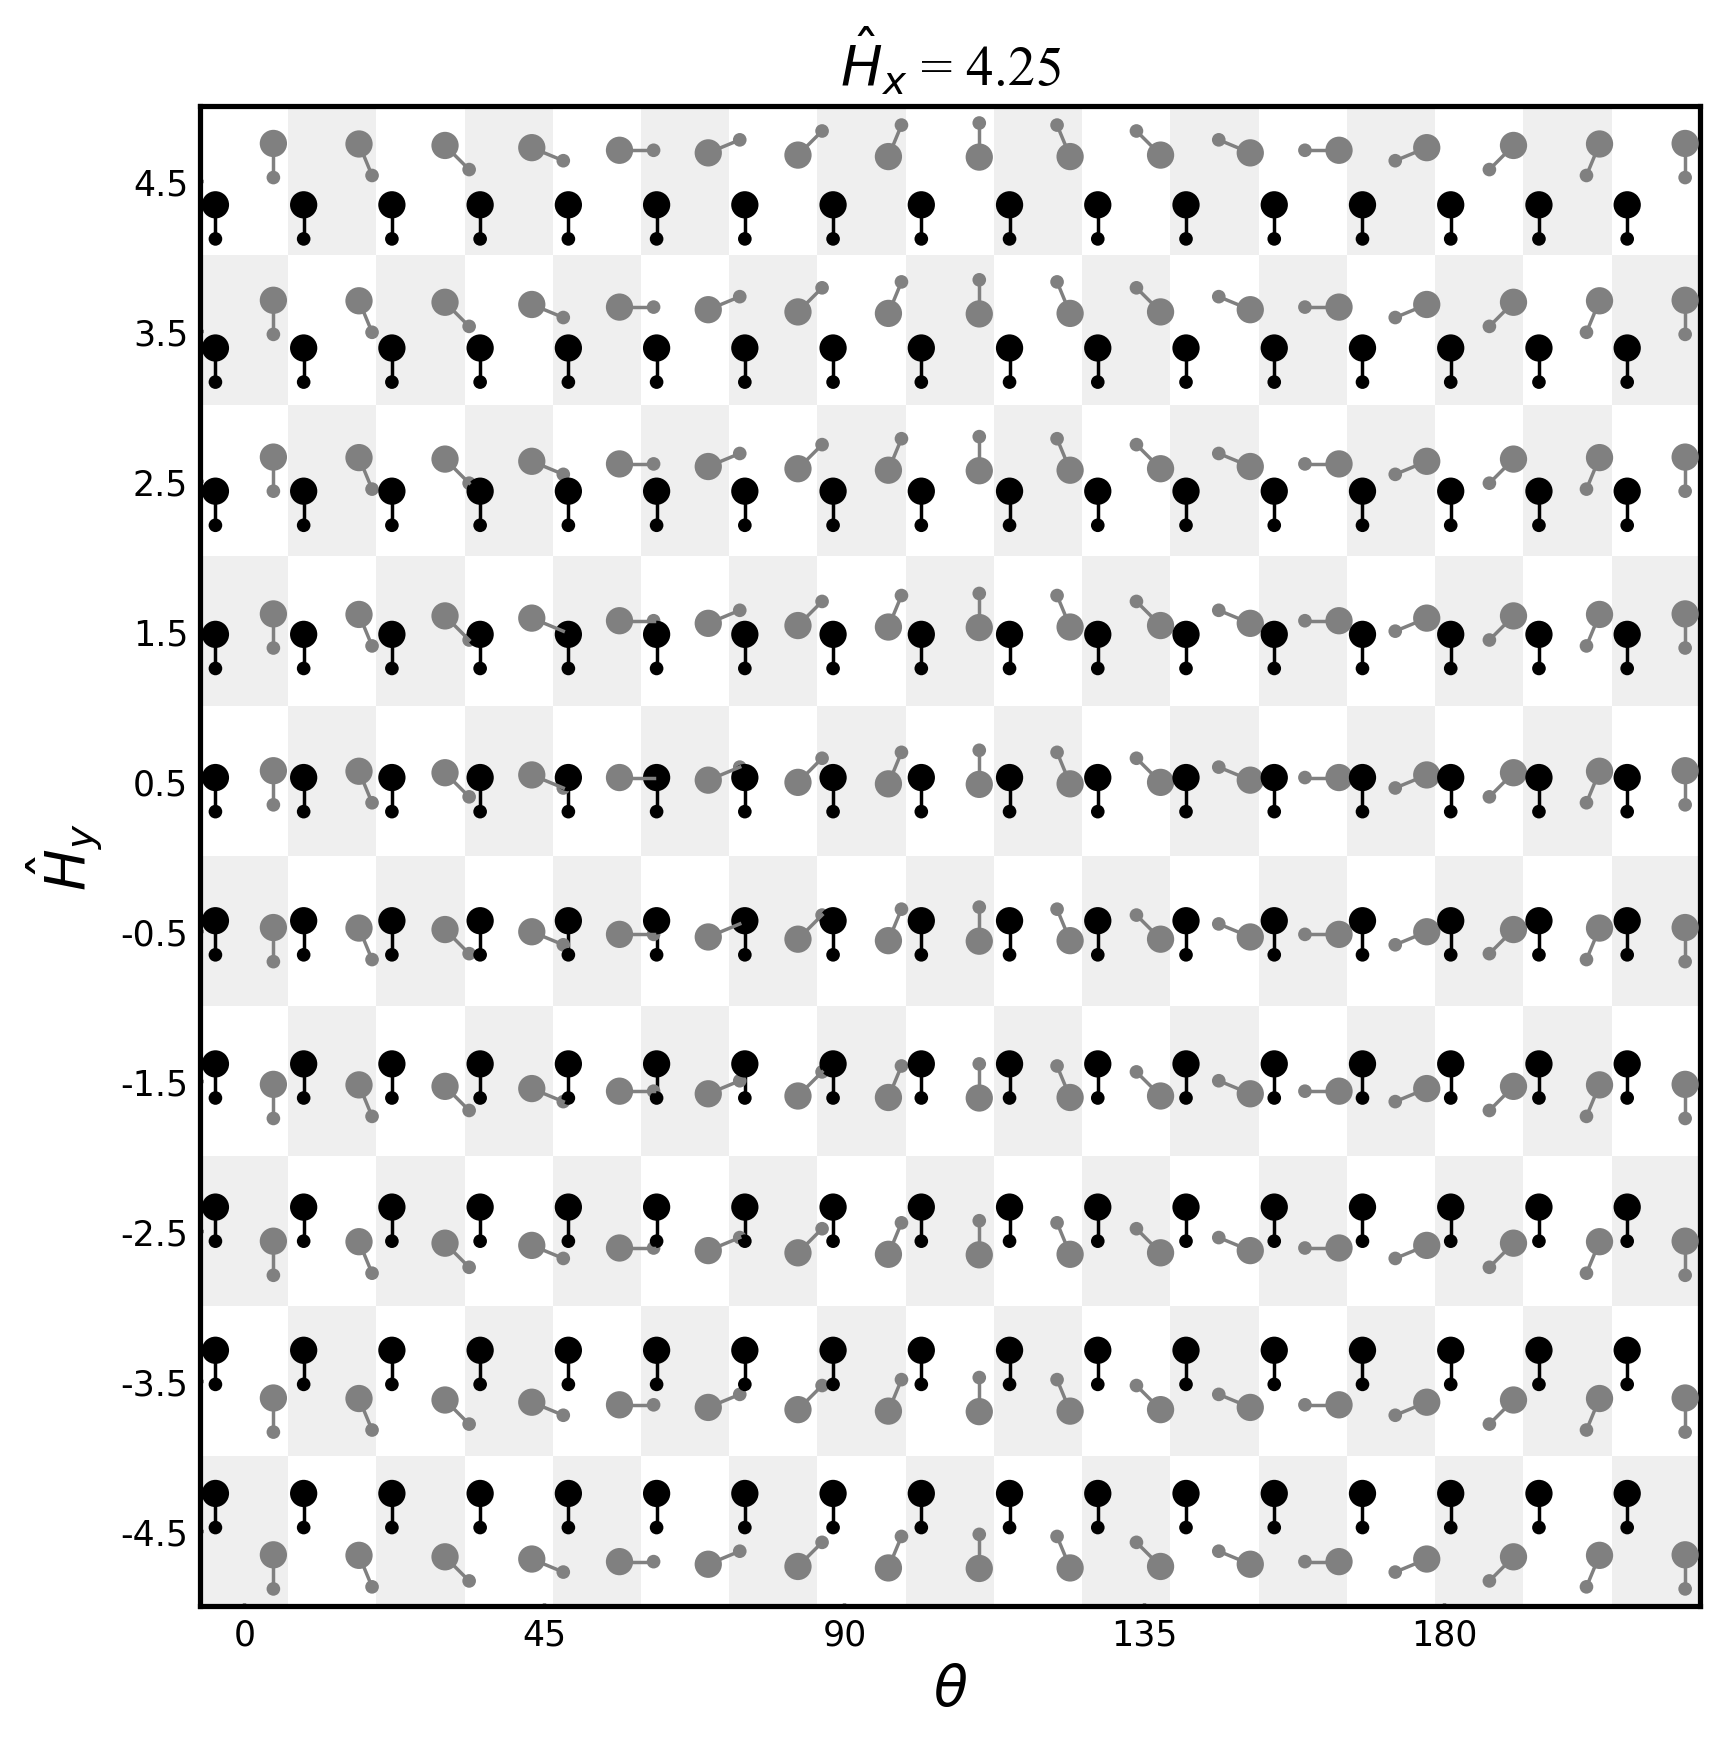

Hx = 2.75: Hy = -3.5: Theta = 202.5
Hx = 2.75: Hy = -3.5: Theta = 225.0
Hx = 2.75: Hy = -3.5: Theta = 247.5
Hx = 2.75: Hy = -3.5: Theta = 270.0
Hx = 2.75: Hy = -2.5: Theta = 45.0
Hx = 2.75: Hy = -2.5: Theta = 112.5
Hx = 2.75: Hy = -2.5: Theta = 202.5
Hx = 2.75: Hy = -2.5: Theta = 225.0
Hx = 2.75: Hy = -2.5: Theta = 247.5
Hx = 2.75: Hy = -2.5: Theta = 270.0
Hx = 2.75: Hy = -2.5: Theta = 292.5
Hx = 2.75: Hy = -1.5: Theta = 45.0
Hx = 2.75: Hy = -1.5: Theta = 67.5
Hx = 2.75: Hy = -1.5: Theta = 112.5
Hx = 2.75: Hy = -1.5: Theta = 135.0
Hx = 2.75: Hy = -1.5: Theta = 202.5
Hx = 2.75: Hy = -1.5: Theta = 225.0
Hx = 2.75: Hy = -1.5: Theta = 247.5
Hx = 2.75: Hy = -1.5: Theta = 270.0
Hx = 2.75: Hy = -1.5: Theta = 292.5
Hx = 2.75: Hy = -1.5: Theta = 315.0
Hx = 2.75: Hy = -0.5: Theta = 45.0
Hx = 2.75: Hy = -0.5: Theta = 67.5
Hx = 2.75: Hy = -0.5: Theta = 112.5
Hx = 2.75: Hy = -0.5: Theta = 135.0
Hx = 2.75: Hy = -0.5: Theta = 202.5
Hx = 2.75: Hy = -0.5: Theta = 225.0
Hx = 2.75: Hy = -0.5: Theta = 247

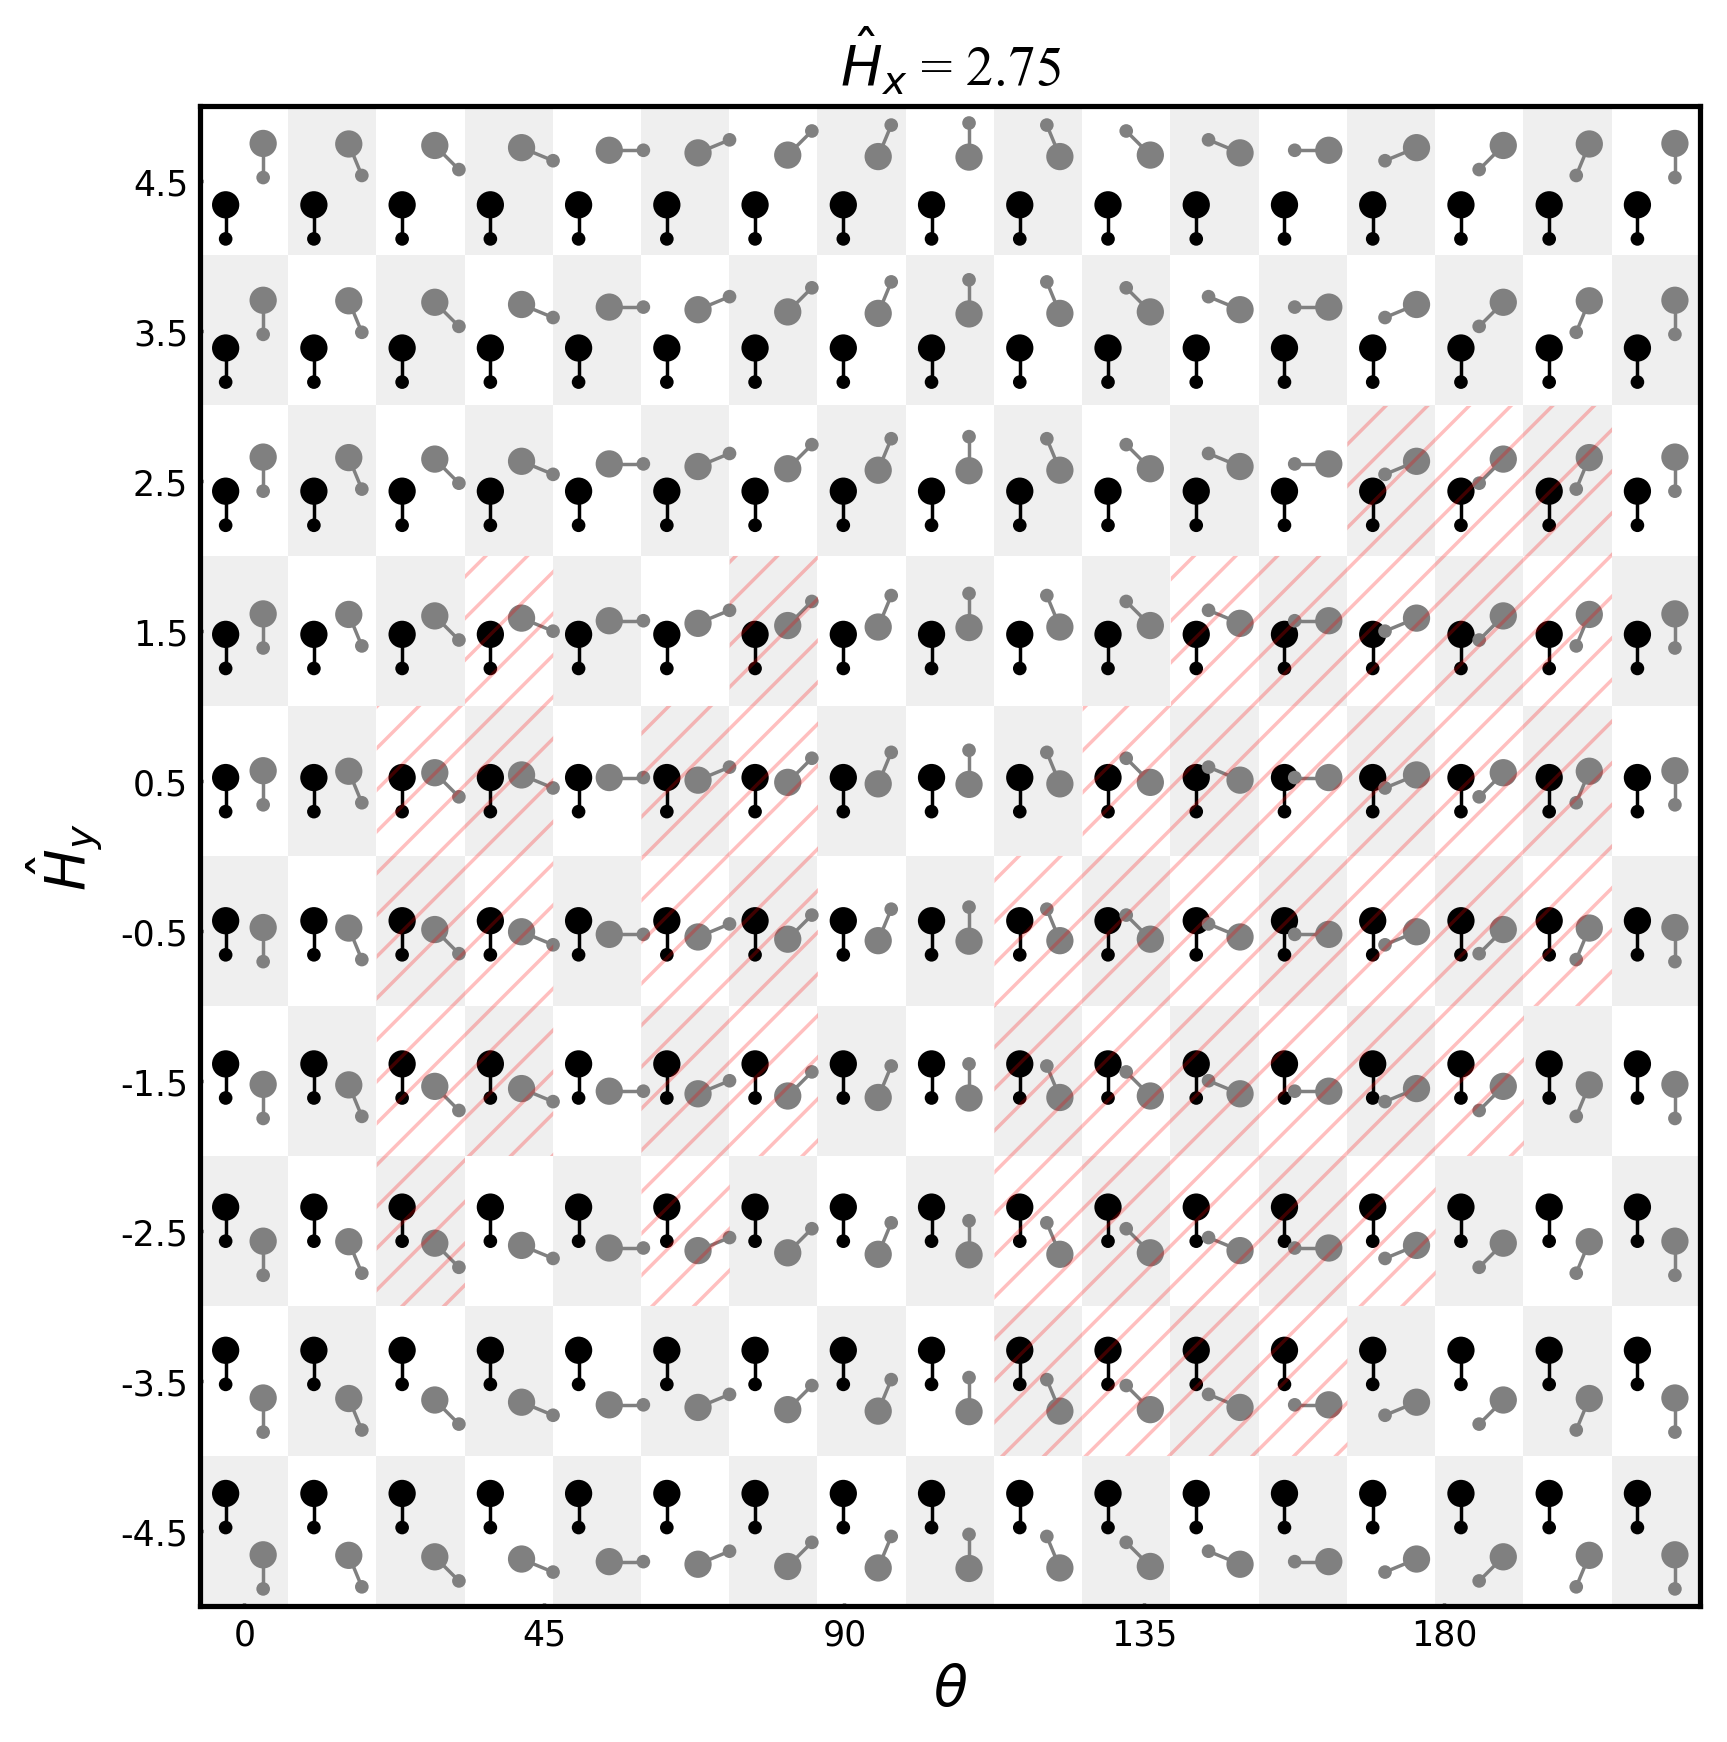

Hx = 0.25: Hy = -4.5: Theta = 135.0
Hx = 0.25: Hy = -4.5: Theta = 157.5
Hx = 0.25: Hy = -4.5: Theta = 180.0
Hx = 0.25: Hy = -4.5: Theta = 202.5
Hx = 0.25: Hy = -4.5: Theta = 225.0
Hx = 0.25: Hy = -3.5: Theta = 0.0
Hx = 0.25: Hy = -3.5: Theta = 22.5
Hx = 0.25: Hy = -3.5: Theta = 45.0
Hx = 0.25: Hy = -3.5: Theta = 67.5
Hx = 0.25: Hy = -3.5: Theta = 90.0
Hx = 0.25: Hy = -3.5: Theta = 112.5
Hx = 0.25: Hy = -3.5: Theta = 135.0
Hx = 0.25: Hy = -3.5: Theta = 157.5
Hx = 0.25: Hy = -3.5: Theta = 180.0
Hx = 0.25: Hy = -3.5: Theta = 202.5
Hx = 0.25: Hy = -3.5: Theta = 225.0
Hx = 0.25: Hy = -3.5: Theta = 247.5
Hx = 0.25: Hy = -3.5: Theta = 270.0
Hx = 0.25: Hy = -3.5: Theta = 292.5
Hx = 0.25: Hy = -3.5: Theta = 315.0
Hx = 0.25: Hy = -3.5: Theta = 337.5
Hx = 0.25: Hy = -3.5: Theta = 360.0
Hx = 0.25: Hy = -2.5: Theta = 0.0
Hx = 0.25: Hy = -2.5: Theta = 22.5
Hx = 0.25: Hy = -2.5: Theta = 45.0
Hx = 0.25: Hy = -2.5: Theta = 67.5
Hx = 0.25: Hy = -2.5: Theta = 90.0
Hx = 0.25: Hy = -2.5: Theta = 112.5
Hx =

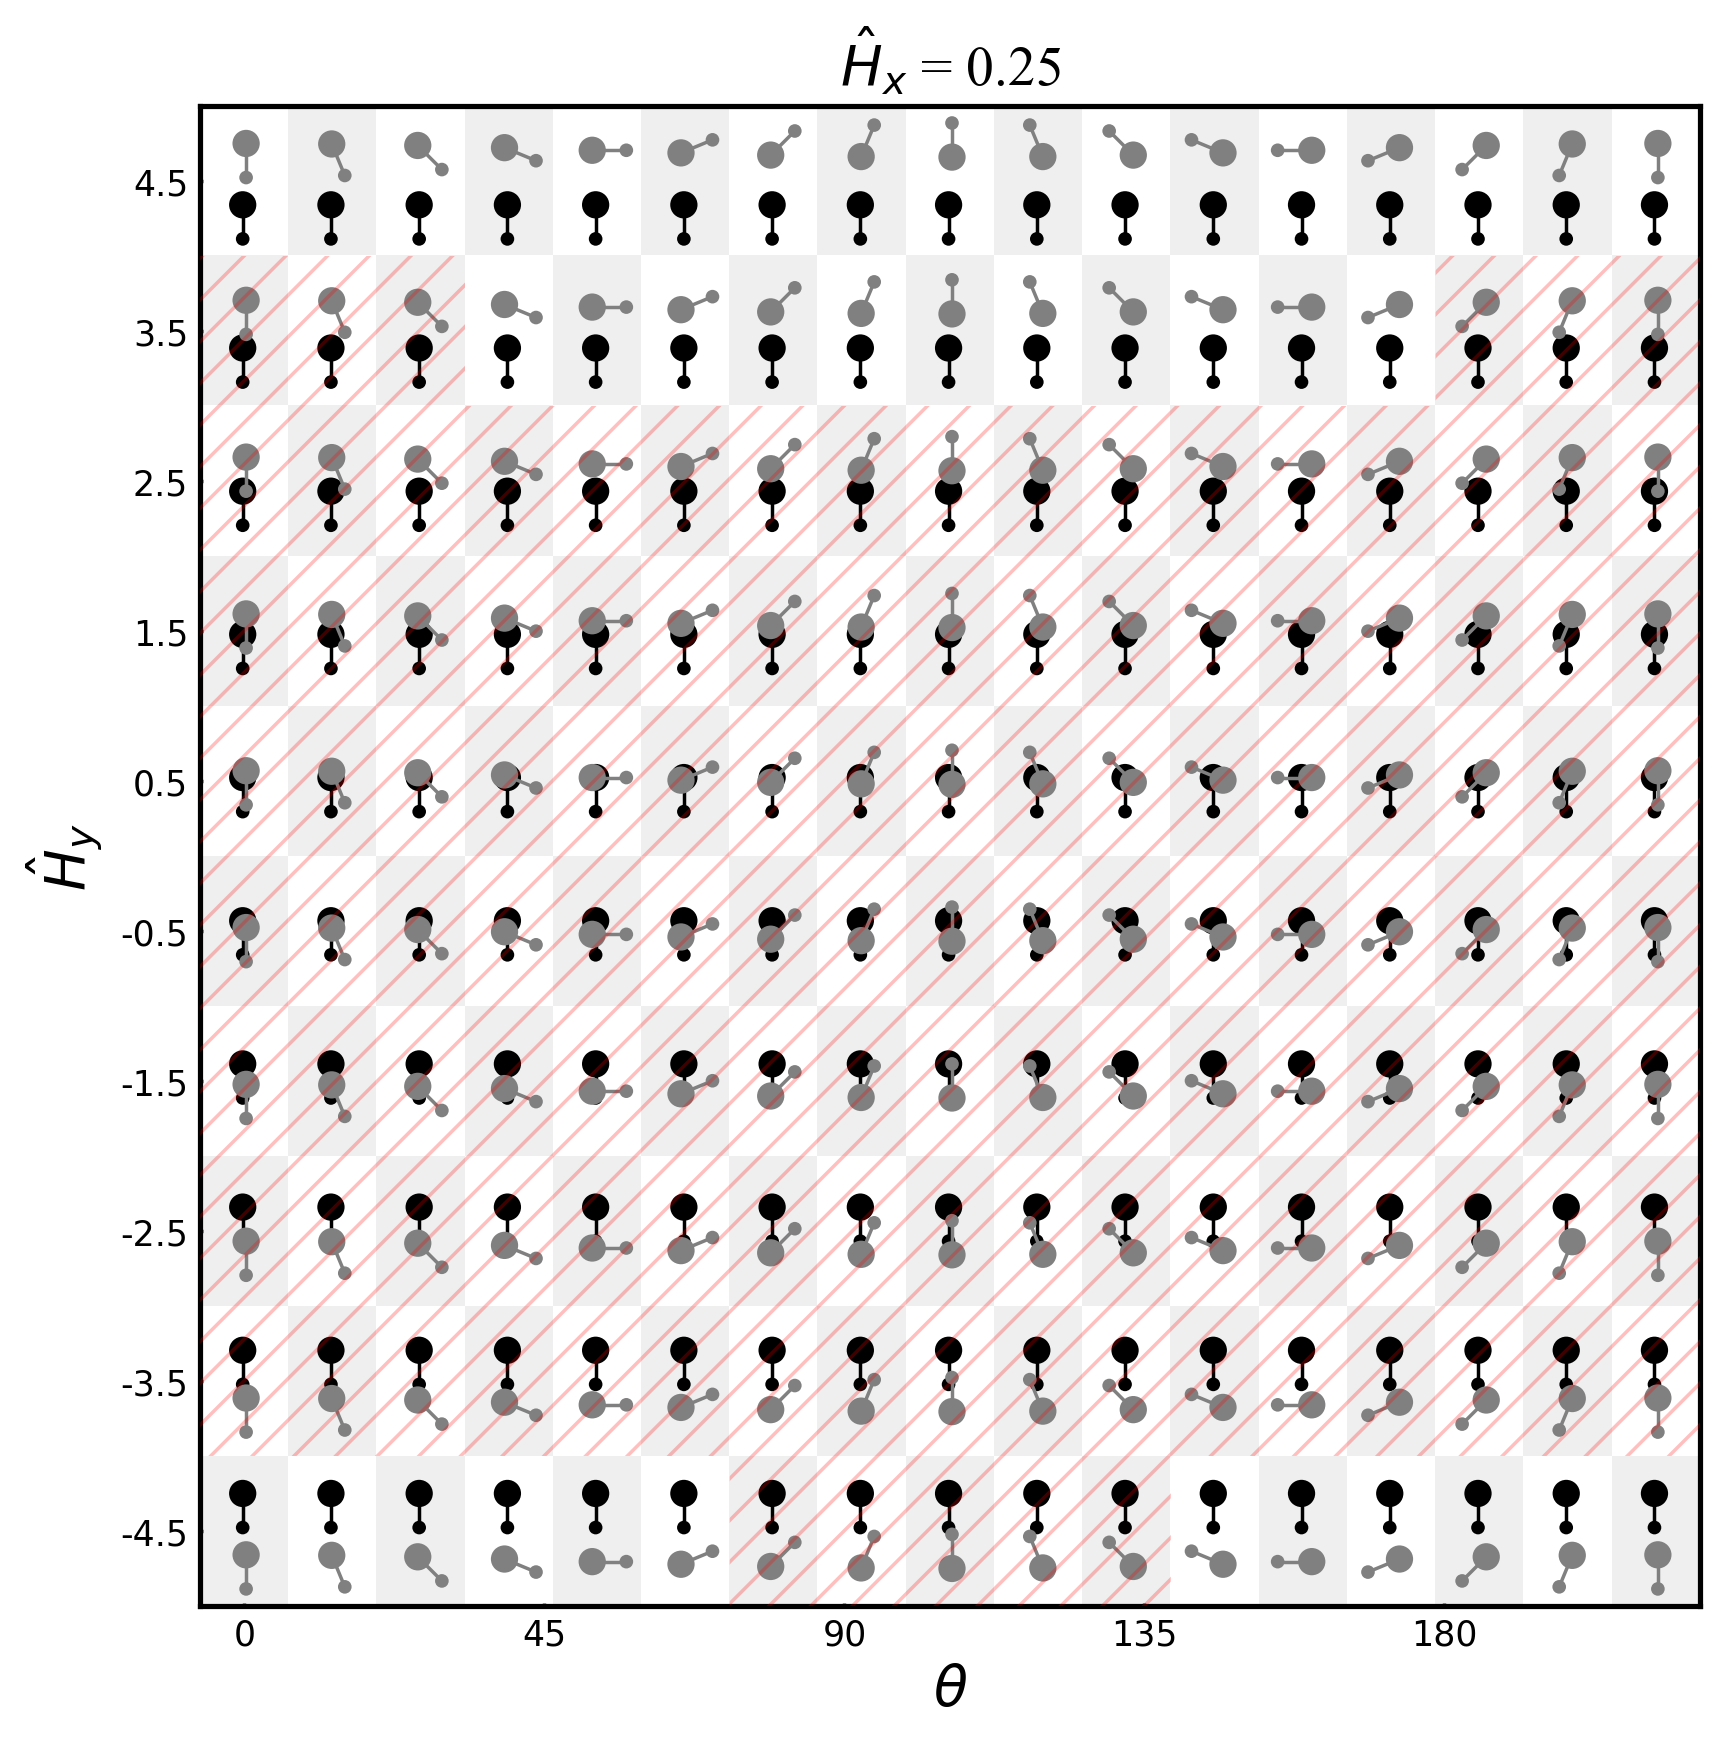

In [60]:
%matplotlib inline
#Here we are going to plot the pair of swimmers in a grid formation 
#for each Hy and Theta chosen from the list
#Trial and error baby!
#We are going to try to make them squares

allViableConfigs = pd.read_csv(cwd_PYTHON+'/allViableConfigs.csv',delimiter=' ')
chosenThetaData = allViableConfigs[allViableConfigs['Theta'] <= 0.1].copy()
chosenThetaData = chosenThetaData[chosenThetaData['Theta'] >= -0.1].copy()
chosenThetaData['Theta'] = 360.0
allViableConfigs = pd.concat([allViableConfigs,chosenThetaData],ignore_index=True)

posDict = {'aXU':[],'aYU':[],'aXL':[],'aYL':[],'bXU':[],'bYU':[],'bXL':[],'bYL':[]}
pos = pd.DataFrame(data=posDict)
#assert factor/spacing >
spacing = float(len(HyList))/float(len(ThetaList))
for Hx in HxList:
    viableConfigs = allViableConfigs[allViableConfigs['Hx'] == Hx].copy()
    fig, ax = plt.subplots(nrows=1,ncols=1,num=1,figsize=(6,6),dpi=250)
    ax.set_title(r'$\hat{H}_x$ = %.2f'%(Hx),fontsize=16,**csfont)
    ax.set_xlabel(r'$\theta$',fontsize=16,**csfont)
    ax.set_ylabel(r'$\hat{H}_y$',fontsize=16,**csfont)
    #Add Checkerboard
    nrows, ncols = len(ThetaList), len(HyList)
    background = np.zeros((ncols,nrows,3))
    for i in range(nrows):
        for j in range(ncols):
            background[j,i,:] = (1.0,)*3 if (i+j)%2 else (0.75,)*3
    boxHeight, boxWidth = 11.0, 11.0*spacing
    ax.imshow(background,cmap=None,extent=(-0.5*boxWidth,(nrows-0.5)*boxWidth,-0.5*boxHeight,(ncols-0.5)*boxHeight),alpha=0.25,origin='lower',zorder=2)#,aspect=boxHeight/boxWidth)
    #1)Find pos of first swimmer. Will use as a global shift
    for idx in range(len(HyList)):
        Hy = HyList[idx]
        valHy = Hy
        if Hy == 0.0:
            valHy = -0.5
        configs = viableConfigs[viableConfigs['Hy'] == valHy].copy()
        for jdx in range(len(ThetaList)):
            Theta = ThetaList[jdx]
            check = configs[configs['Theta'] == Theta].copy()
            #print('configs = ',configs)
            if len(ThetaList) > len(HyList):
                #globalShift = np.array([jdx*factor*spacing,idx*factor])
                globalShift = np.array([(boxWidth)*jdx,(boxHeight)*idx])
            else:
                globalShift = np.array([boxWidth*jdx,boxHeight*idx])
                #globalShift = np.array([jdx*factor,idx*factor/spacing])
            #Calculate pos of first swimmer
            aU, aL = CalcSphereCenters(globalShift,1,0.0,Hy,Hx)
            bU, bL = CalcSphereCenters(globalShift,2,Theta,Hy,Hx)
            pos.loc[0,'aXU'], pos.loc[0,'aYU'] = aU[0], aU[1]
            pos.loc[0,'aXL'], pos.loc[0,'aYL'] = aL[0], aL[1]
            pos.loc[0,'bXU'], pos.loc[0,'bYU'] = bU[0], bU[1]
            pos.loc[0,'bXL'], pos.loc[0,'bYL'] = bL[0], bL[1]
            #print(pos)
            #Plot onto grid
            AddDiscsToPlot(ax,pos)
            if check.empty:
                print('Hx = {0}: Hy = {1}: Theta = {2}'.format(Hx,Hy,Theta))
                ax.add_patch(patches.Rectangle(((globalShift[0]-0.5*boxWidth), (globalShift[1]-0.5*boxHeight)), boxWidth, boxHeight, 
                         hatch='//', fill=False, snap=False, linewidth=0, color='r', alpha=0.25,zorder=7))
    
    ax.set_aspect('equal')
    ax.tick_params(which='major',axis='both',direction='in',length=1,width=1,zorder=1)
    #ax.xaxis.set_major_locator(MultipleLocator(11.0))
    ax.xaxis.set_major_locator(MultipleLocator(22.0))
    ax.yaxis.set_major_locator(MultipleLocator(11.0))
    ax.set_yticklabels(['temp']+HyList)
    ax.set_xticklabels(['temp']+[0,45,90,135,180,225,270,315,360])
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(10)
    #ax.axis([-5,(len(ThetaList)-1)*factor*spacing+5,-factor-10,(len(HyList)-2)*factor+10])
    fig.tight_layout()
    ax = set_size(6,6,ax)
    strDir = cwd_PYTHON+"/../Figures/"
    pathlib.Path(strDir).mkdir(parents=True, exist_ok=True)
    fig.savefig(strDir+'init_config_grid_Hx{0}_All_square.png'.format(Hx))
    plt.show()
    fig.clf()
    plt.close


In [6]:
%matplotlib inline

def Construct_Image_Data(data,nrows,ncols):
    #From our color data and initial configurations, construct 2D mesh which has positions and colors for each position
    #If parHx and parHy do not exist, make color white
    xval = np.linspace(0.0,360.0,nrows)
    yval = np.linspace(-4.5,4.5,ncols)
    #print(xval)
    #print(yval)
    
    image = np.ones((ncols,nrows,3)) #idx, jdx, r, g, b
    
    for idx in range(len(xval)):
        xData = data[data['parThetaBW'] <= xval[idx] + 0.01].copy()
        xData = xData[xData['parThetaBW'] >= xval[idx] - 0.01].copy()
        for jdx in range(len(yval)):
            df = xData[xData['parHy'] <= yval[jdx]+0.01].copy()
            df = df[df['parHy'] >= yval[jdx]-0.01].copy()
            #print(len(df['parHy']))
            if(len(df['parHy']) == 1):
                image[jdx,idx,:] = [df['color_r'].values/255.0,df['color_g'].values/255.0,df['color_b'].values/255.0]               
            else:
                image[jdx,idx,:] = (1.0,)*3 if (idx+jdx)%2 else (0.75,)*3    
    return image

#Here we are going to plot the pair of swimmers in a grid formation 
#for each Hy and Theta chosen from the list
#Trial and error baby!

#Here are the sims which have been corrected from NOTA to the closest pair configuration
#These have been reviewed manually and the corrected state values will be included in a list
#We will then correct the values in our allData dataframe for the selected (parHx,parHy,Theta) sims
Re2correctparHx = [1.25,1.75,1.75,2.75,3.25,3.25,3.25,3.75,3.75,4.25,5.25,6.25,6.25]
Re2correctparHy = [-3.5,3.5,-4.5,-1.5,1.5,2.5,-2.5,-2.5,1.5,-3.5,-1.5,1.5,2.5]
Re2correctparTheta = [112.5,90.0,157.5,157.5,225.0,337.5,337.5,135.0,315.0,202.5,202.5,337.5,337.5]
Re2correctedState = [4,0,2,2,2,1,1,4,1,2,2,1,1]

Re7correctparHx = []
Re7correctparHy = []
Re7correctparTheta = []
Re7correctedState = []

#state = 4 = SF
Re10correctparHx = [0.25,0.25,0.25,0.75,1.25,2.25,2.25,2.75,3.25,3.25,
                    3.25,3.75,3.75,4.25,4.25,4.75,4.75,4.75,4.75,4.75,
                    4.75,5.25,5.25,5.25,5.25,5.25,5.75,5.75,5.75,5.75,
                    5.75,5.75,5.75,6.25,6.25,6.25,6.25,6.25,6.25,6.25,
                    6.25,6.25,6.25,6.25,6.25]
Re10correctparHy = [4.5,-4.5,4.5,4.5,4.5,4.5,4.5,4.5,-2.5,4.5,
                    3.5,1.5,2.5,4.5,3.5,4.5,1.5,4.5,3.5,2.5,
                    3.5,-2.5,4.5,4.5,0.5,3.5,-2.5,4.5,3.5,-0.5,
                    3.5,3.5,2.5,3.5,-2.5,-3.5,3.5,2.5,0.5,-1.5,
                    2.5,0.5,-0.5,3.5,1.5]
Re10correctparTheta = [0.0,0.0,270.0,247.5,180.0,45.0,225.0,225.0,45.0,202.5,
                       202.5,157.5,180.0,180.0,180.0,90.0,112.5,157.5,157.5,157.5,
                       337.5,45.0,67.5,90.0,112.5,157.5,45.0,67.5,90.0,90.0,
                       112.5,135.0,135.0,45.0,45.0,45.0,67.5,67.5,67.5,67.5,
                       90.0,90.0,90.0,112.5,112.5]
Re10correctedState = [4,4,3,3,3,'missing',3,0,'missing',0,
                      'idk','idk','idk',0,'idk',3,3,3,3,3,
                      2,1,0,0,1,0,1,0,1,0,
                      0,0,3,0,0,0,1,1,3,0,
                      0,1,0,0,0]

allViableConfigs = pd.read_csv(cwd_PYTHON+'/allViableConfigs.csv',delimiter=' ')
chosenThetaData = allViableConfigs[allViableConfigs['Theta'] <= 0.1].copy()
chosenThetaData = chosenThetaData[chosenThetaData['Theta'] >= -0.1].copy()
chosenThetaData['Theta'] = 360.0
allViableConfigs = pd.concat([allViableConfigs,chosenThetaData],ignore_index=True)

posDict = {'aXU':[],'aYU':[],'aXL':[],'aYL':[],'bXU':[],'bYU':[],'bXL':[],'bYL':[]}
pos = pd.DataFrame(data=posDict)

ReList=[2,10,7]
for Re in ReList:
    print('Re = ',Re)
    if(Re == 7):
        allData = pd.read_csv(cwd_PYTHON+'/endData_Re{0}_lt.csv'.format(Re),delimiter=' ')
    else:
        allData = pd.read_csv(cwd_PYTHON+'/endData_Re{0}_.csv'.format(Re),delimiter=' ')
    endDict = {'parThetaBW':allData['parThetaBW'],'parHx':allData['parHx'],'parHy':allData['parHy'],
               'State':allData['State'],'color_tuple':allData['color_tuple'],
               'color_r':allData['color_r'],'color_g':allData['color_g'],'color_b':allData['color_b']}
    endData = pd.DataFrame(data=endDict)
    endData = endData.sort_values(by=['parHx','parThetaBW','parHy'])
    endData = endData.reset_index(drop=True)
    chosenThetaData = endData[endData['parThetaBW'] <= 0.1].copy()
    chosenThetaData = chosenThetaData[chosenThetaData['parThetaBW'] >= -0.1].copy()
    chosenThetaData['parThetaBW'] = 360.0
    endData = pd.concat([endData,chosenThetaData],ignore_index=True)
    
    for Hx in HxList:
        viableConfigs = allViableConfigs[allViableConfigs['Hx'] == Hx].copy()
        viableConfigs = viableConfigs.reset_index(drop=True)
        
        data = endData[endData['parHx'] <= float(Hx)+0.01].copy()
        data = data[data['parHx'] >= float(Hx)-0.01].copy()
        data = data.sort_values(by=['parThetaBW','parHy'])
        data = data.reset_index(drop=True)
        
        fig, ax = plt.subplots(nrows=1,ncols=1,num=1,figsize=(14,8),dpi=250)
        ax.set_title(r'$\hat{H}_x$ = %.2f'%(Hx),fontsize=24,**csfont)
        ax.set_xlabel(r'$\theta$',fontsize=24,**csfont)
        ax.set_ylabel(r'$\hat{H}_y$',fontsize=24,**csfont)
        #Add Image Color from data
        nrows, ncols = len(ThetaList), len(HyList)
        image = Construct_Image_Data(data,nrows,ncols)
        boxHeight, boxWidth = 11.0, 11.0
        ax.imshow(image,cmap=None,extent=(-0.5*boxWidth,(nrows-0.5)*boxWidth,-0.5*boxHeight,(ncols-0.5)*boxHeight),alpha=0.25,origin='lower',zorder=2)#,aspect=boxHeight/boxWidth)
        #1)Find pos of first swimmer. Will use as a global shift
        for idx in range(len(HyList)):
            Hy = HyList[idx]
            valHy = Hy
            if Hy == 0.0:
                valHy = -0.5
            configs = viableConfigs[viableConfigs['Hy'] == valHy].copy()
            for jdx in range(len(ThetaList)):
                Theta = ThetaList[jdx]
                check = configs[configs['Theta'] == Theta].copy()
                #print('configs = ',configs)
                if len(ThetaList) > len(HyList):
                    #globalShift = np.array([jdx*factor*spacing,idx*factor])
                    globalShift = np.array([(boxWidth)*jdx,(boxHeight)*idx])
                else:
                    globalShift = np.array([boxWidth*jdx,boxHeight*idx])
                    #globalShift = np.array([jdx*factor,idx*factor/spacing])
                #Calculate pos of first swimmer
                aU, aL = CalcSphereCenters(globalShift,1,0.0,Hy,Hx)
                bU, bL = CalcSphereCenters(globalShift,2,Theta,Hy,Hx)
                pos.loc[0,'aXU'], pos.loc[0,'aYU'] = aU[0], aU[1]
                pos.loc[0,'aXL'], pos.loc[0,'aYL'] = aL[0], aL[1]
                pos.loc[0,'bXU'], pos.loc[0,'bYU'] = bU[0], bU[1]
                pos.loc[0,'bXL'], pos.loc[0,'bYL'] = bL[0], bL[1]
                #print(pos)
                #Plot onto grid
                AddDiscsToPlot(ax,pos)
                if check.empty:
                    #print('Hx = {0}: Hy = {1}: Theta = {2}'.format(Hx,Hy,Theta))
                    ax.add_patch(patches.Rectangle(((globalShift[0]-5.5), (globalShift[1]-5.5)), 11.0, 11.0, 
                             hatch='//', fill=False, snap=False, linewidth=0, color='r', alpha=0.25,zorder=7))

        
        testDict = {'Hx':data['parHx'],'Hy':data['parHy'],'Theta':data['parThetaBW']}
        testData = pd.DataFrame(data=testDict)
        testData = testData.sort_values(by=['Hy','Theta'])
        testData = testData.reset_index(drop=True)
        testData['comb'] = 's'
        for idx in range(len(testData['Hy'])):
            testData = testData.set_value(idx,'comb', (np.round(testData.loc[idx,'Hy'],2),np.round(testData.loc[idx,'Theta'],2)))
            #testData.loc[idx,'comb'] = (testData.loc[idx,'Hy'], testData.loc[idx,'Theta'])
        #Do the same for viable configs
        viableConfigs['comb'] = 's'
        for idx in range(len(viableConfigs['Hy'])):
            viableConfigs = viableConfigs.set_value(idx,'comb', (np.round(viableConfigs.loc[idx,'Hy'],2),np.round(viableConfigs.loc[idx,'Theta'],2)))
            #configs.loc[idx,'comb'] = (configs.loc[idx,'Hy'], configs.loc[idx,'Theta'])

        unique = viableConfigs[~viableConfigs['comb'].isin(testData['comb'])]
        #print(unique)
        unique = unique.reset_index(drop=True)
        if len(unique['comb']) > 0:
            for idx in range(len(unique['comb'])):
                ax.add_patch(patches.Rectangle(((boxWidth*unique.loc[idx,'Theta']/22.5-0.5*boxWidth), (boxHeight*(unique.loc[idx,'Hy']+4.5)-0.5*boxHeight)), boxWidth, boxHeight, 
                             hatch='xx', fill=False, snap=False, linewidth=0, color='k',zorder=7))

        #Insert black borders
        #Value = np.zeros((ncols,nrows))
        #xval = np.linspace(-0.5*boxWidth,nrows*boxWidth-0.5*boxWidth,nrows)
        #yval = np.linspace(-0.5*boxHeight,nrows*boxHeight-0.5*boxHeight,ncols)
        #mx,my = np.meshgrid(xval,yval)
        #ax.pcolor([mx,my],Value, edgecolors='k', linewidths=1)
        
        ax.set_aspect('equal')
        ax.tick_params(which='major',axis='both',direction='in',length=1,width=1,zorder=1)
        #ax.xaxis.set_major_locator(MultipleLocator(11.0))
        #ax.yaxis.set_major_locator(MultipleLocator(11.0))
        ax.xaxis.set_major_locator(MultipleLocator(22.0))
        ax.yaxis.set_major_locator(MultipleLocator(22.0))
        ax.set_yticklabels(['temp']+HyList[::2])
        ax.set_xticklabels(['temp']+[0,45,90,135,180,225,270,315,360])
        for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontsize(18)
        #ax.axis([-5,(len(ThetaList)-1)*factor*spacing+5,-factor-10,(len(HyList)-2)*factor+10])
        ax = set_size(0.4*17,4,ax)
        #fig.tight_layout()
        #ax = set_size(0.6*17,6,ax)
        strDir = cwd_PYTHON+"/../Figures/PhaseSpace/Re{0}/Constant_Hx/Rect/Rd3/".format(Re)
        pathlib.Path(strDir).mkdir(parents=True, exist_ok=True)
        fig.savefig(strDir+'Re{0}_Constant_Hx{1}_.png'.format(Re,Hx))
        #fig.savefig(strDir+'Re{0}_Constant_Hx{1}_.svg'.format(Re,Hx))
        #plt.show()
        fig.clf()
        plt.close
        
        print('Hx = {0} is complete!'.format(Hx))



Re =  2


/Users/thomas/anaconda3/envs/tf-research/lib/python3.6/site-packages/ipykernel_launcher.py:118: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/Users/thomas/anaconda3/envs/tf-research/lib/python3.6/site-packages/ipykernel_launcher.py:123: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



Hx = 6.25 is complete!
Hx = 5.75 is complete!
Hx = 5.25 is complete!
Hx = 4.75 is complete!
Hx = 4.25 is complete!
Hx = 3.75 is complete!
Hx = 3.25 is complete!
Hx = 2.75 is complete!
Hx = 2.25 is complete!
Hx = 1.75 is complete!
Hx = 1.25 is complete!
Hx = 0.75 is complete!
Hx = 0.25 is complete!
Re =  10
Hx = 6.25 is complete!
Hx = 5.75 is complete!
Hx = 5.25 is complete!
Hx = 4.75 is complete!
Hx = 4.25 is complete!
Hx = 3.75 is complete!
Hx = 3.25 is complete!
Hx = 2.75 is complete!
Hx = 2.25 is complete!
Hx = 1.75 is complete!
Hx = 1.25 is complete!
Hx = 0.75 is complete!
Hx = 0.25 is complete!
Re =  7
Hx = 6.25 is complete!
Hx = 5.75 is complete!
Hx = 5.25 is complete!
Hx = 4.75 is complete!
Hx = 4.25 is complete!
Hx = 3.75 is complete!
Hx = 3.25 is complete!
Hx = 2.75 is complete!
Hx = 2.25 is complete!
Hx = 1.75 is complete!
Hx = 1.25 is complete!
Hx = 0.75 is complete!
Hx = 0.25 is complete!


<Figure size 2193.55x1324.5 with 0 Axes>